<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simple-first-run" data-toc-modified-id="Simple-first-run-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simple first run</a></span></li></ul></div>

In [546]:
import numpy as np
import matplotlib.pyplot as plt

## Simple first run

1. Iniatilize NxN grid
2. Compute the initial energy $E$
3. Flip random spin and compute $\Delta E$
4. Accept or reject based on criteria
5. Continue to 3

In [548]:
def adjacent_indices_torus(idx, N):
    i, j = idx
    return [
        ((i+1)%N, j),
        ((i-1), j),
        (i, (j+1)%N),
        (i, (j-1)),
    ]

#@profile
def simulate_ising(grid, beta, J, mu, steps=int(1e5)):
    # This is not efficient, but is clear to read
    E = 0
    for i in range(N):
        for j in range(N):
            adj_ = adjacent_indices_torus((i,j), N)
            E += sum(-J*grid[i,j]*grid[ix] for ix in adj_)
            E += -mu*grid[i, j]

    averages = []
    energies = []
    print('Starting energy', E)
    randix = (np.random.randint(0, N, size=(steps,2)))
    for n in range(steps):
        #averages.append(np.mean(grid))
        energies.append(E)
        i,j = randix[n]
        x = grid[i,j]
        adj_ = adjacent_indices_torus((i,j), N)
        dE = J*x*sum(grid[ix] for ix in adj_) + mu*x
        dE *= 2

        if dE < 0:
            grid[i, j] = - x
            E = E + dE
            continue

        accept_p = np.exp(-beta*dE)
        if accept_p>np.random.rand():
            grid[i, j] = - x
            E = E + dE
    return grid, averages, energies

adjacent_indices_torus((1, 20), 20)

[(2, 20), (0, 20), (1, 1), (1, 19)]

In [549]:
# Insight from using full energy
np.seterr(over='raise')

{'divide': 'warn', 'over': 'raise', 'under': 'ignore', 'invalid': 'warn'}

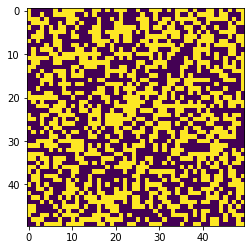

In [550]:
N = 50
grid = np.random.randint(low=0, high=2, size=(N, N))
plt.imshow(grid)
# Rescale to +-1
grid = -1 + 2*grid

/home/dali/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/home/dali/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


Starting energy -148.0
Starting energy -12.0
Starting energy -60.0
Starting energy -104.0
Starting energy -32.0
Starting energy 104.0
Starting energy -32.0
Starting energy 0.0
Starting energy -4.0
Starting energy -132.0


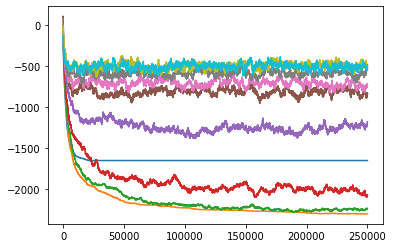

In [562]:
J = 0.5
mu = 0

temps = np.linspace(0, 3, 10)
averages_b = []
for T in temps:
    beta = 1/T
    grid = np.random.randint(low=0, high=2, size=(N, N))
    #grid = np.ones((N,N))
    grid = -1 + 2*grid
    grid, averages, energies = simulate_ising(grid, beta, J, mu, steps=N**2*100)
    plt.plot(energies)
    averages_b.append(np.mean(grid))
    

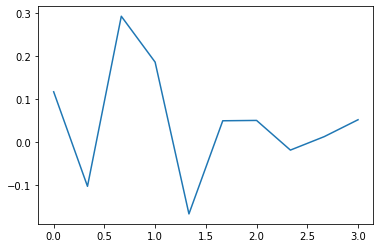

In [563]:
plt.plot(temps, averages_b)

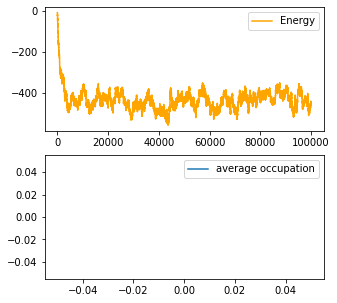

In [554]:
fig, axs = plt.subplots(2,1, figsize=(5,5))
plt.plot(averages, label='average occupation') 
plt.legend()
plt.sca(axs[0])
plt.plot(energies, label='Energy', color='orange') 
plt.legend()

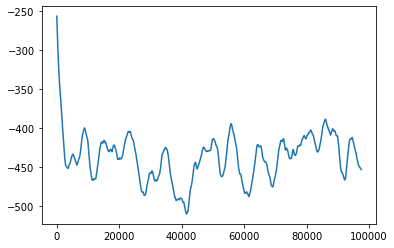

In [559]:
plt.plot(np.convolve(energies, np.ones((N**2,))/N**2, mode='valid'))

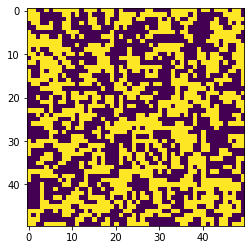

In [440]:
plt.imshow(grid)